# Programming for Data Analytics Final Project
## Nabil Arnaoot
## Dec 13, 2021

This project is for the class of OPS802. The target of the project is to have a hands on full data analytics experience from A to Z. That means starting with raw data and reading it into python then doing some analytical and statstical observations on the data and finally doing some supervised and unsupervised learning on the data. The data we will use for this project is one of the most famous datasets in the machine learning world which is called IRIS classification dataset. That means there is plenty of resources for you online to learn from and that you are not the first person who saw and analyzed this data. Use this to your advantage. The Iris flower data set or Fisher's Iris data set is a multivariate data set introduced by the British statistician and biologist Ronald Fisher in his 1936 paper "The use of multiple measurements in taxonomic problems" as an example of linear discriminant analysis. We will describe it more in details later. The project measures the capabilities of lodaing data, cleaning it up, running some tests and statistical analysis and finally machine learning. The following highlights the project
-  The project consists of four parts, they are mostly independent and in order based on what we studies in class
-  The deadline of the project is the last day of the quarter
-  The project is individual, however I encourage you to talk to each other to check your different approaches without copying codes or talking about detailed code specific. For example, it is ok to ask about which function you have used to tackle part a and is it better than this other function or not. It is not ok to copy the exact code including that function you asked about.
- You are expected to heavily utilize resources outside the class notebooks such as Google, StackOverflow, .. etc
- Code cleanings and Display has 10% of the grade

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Part1: Data Loading and Cleaning up
The iris flower dataset consists of 150 collected observations for different flower's charachteristics. The dataset contains four attributes. These four attributes help decide which Iris class does the flower belong to. The four attributes are sepal length, sepal width, petal length, and petal width; all in cm. The data set contains 3 classes Iris Setosa, Iris Versicolour, and Iris Virginica. For more info about the dataset, you can chek [this link](https://en.wikipedia.org/wiki/Iris_flower_data_set). The end target of the project will be to build a model that can predict, based on the four attributes, which class does the flower belong to.

In the first part of the project we will start by loading the data and cleaning up any problems within the data. 

- load the Iris dataset using the file iris.data. You can open it with any text editor to find out how it looks like. Decide which separator you would like to use and if any rows needs to be skipped
<br>
Now let's do some exploring
- How many rows and colums are in the file
- How many nulls in the file
- Which rows contains nans and how many nans in each of these rows
- How many nans per columns?
- The 36th sample should be: 4.9,3.1,1.5,0.2,"Iris-setosa" based on the original paper. Is that what you have? If not, fix it
- The 39th sample: 4.9,3.6,1.4,0.1,"Iris-setosa",  where the errors are in the second and third features. Fix it

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
# load the Iris dataset using the file iris.data. You can open it with any text editor to find out how it looks like. 
# Decide which separator you would like to use and if any rows needs to be skipped

df = pd.read_csv("iris_not_clean.data", header=None, sep='|', skiprows=[1, 34], names=['sepal_length','sepal_width','petal_length','petal_width','class'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# How many rows and colums are in the file

df.shape

# 153 rows, 5 columns

(153, 5)

In [5]:
# How many nulls in the file
df.isnull().sum().sum()

9

In [6]:
# Which rows contains nans and how many nans in each of these rows

df[df.isnull().any(axis=1)].isnull().sum(axis=1)


28    1
29    5
44    3
dtype: int64

In [7]:
# How many nans per columns?

df.isnull().sum()

sepal_length    2
sepal_width     1
petal_length    2
petal_width     2
class           2
dtype: int64

In [8]:
# The 36th sample should be: 4.9,3.1,1.5,0.2,"Iris-setosa" based on the original paper.
# Is that what you have? If not, fix it

# check 36th sample, note the 4th element is incorrect
df.iloc[35]

# identify the incorrect 4th element
df.iloc[35,3]

# change the 4th element
df.iloc[35,3] = 0.2

# confirm the corrected sample
df.iloc[35]

sepal_length            4.9
sepal_width             3.1
petal_length            1.5
petal_width             0.1
class           Iris-setosa
Name: 35, dtype: object

0.1

sepal_length            4.9
sepal_width             3.1
petal_length            1.5
petal_width             0.2
class           Iris-setosa
Name: 35, dtype: object

In [9]:
# The 39th sample: 4.9,3.6,1.4,0.1,"Iris-setosa", where the errors are in the second and third features. 
# Fix it

# view the 39th sample
df.iloc[38]

# view then correct the incorrect 2nd feature
df.iloc[38, 1]
df.iloc[38, 1] = 3.6

# view then correct the incorrect 3rd feature
df.iloc[38,2]
df.iloc[38,2] = 1.4

# view the corrected 39th sample
df.iloc[38]

sepal_length            4.9
sepal_width             3.1
petal_length            1.5
petal_width             0.1
class           Iris-setosa
Name: 38, dtype: object

3.1

1.5

sepal_length            4.9
sepal_width             3.6
petal_length            1.4
petal_width             0.1
class           Iris-setosa
Name: 38, dtype: object

# Part 2: Statistical Exploring
In this part we will understand a little more about the data and do some cool plottings
- What is the mean and variance for each column and use the function describe to get insights about the data
- Drop the nan rows
- Recaluclate the mean and variance for each column
- What is the correlation between the fourth column and each of the other three columns individually? Any observations
- How many records exist for each class. # Hint, you can do this in one line by using groupby
- Change the random seed to 1234 and randomly pick 20 samples of the data and display it
- Plot histogram for all the data attributes
- Plot histogram for all the data attributes per class, i.e. grouped by classes

In [10]:
# What is the mean and variance for each column and use the function describe to get insights about the data

print('\nColumn means:')
df.mean(numeric_only=True)

print('\n\nColumn variance:')
df.var(numeric_only=True)

print('\n\nOther info:')
df.describe()



Column means:


sepal_length    5.833775
sepal_width     3.060526
petal_length    3.746358
petal_width     1.192715
dtype: float64



Column variance:


sepal_length    0.694918
sepal_width     0.188365
petal_length    3.116903
petal_width     0.583747
dtype: float64



Other info:


,sepal_length,sepal_width,petal_length,petal_width
count,151.000000,152.000000,151.000000,151.000000
mean,5.833775,3.060526,3.746358,1.192715
std,0.833618,0.434011,1.765475,0.764033
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.300000,1.300000
75%,6.400000,3.325000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [11]:
# Put mean & variance into dataframe to compare after changes

stats_df = pd.DataFrame()

stats_df['orig_mean'] = df.mean(numeric_only=True)
stats_df['orig_var'] = df.var(numeric_only=True)

stats_df

,orig_mean,orig_var
sepal_length,5.833775,0.694918
sepal_width,3.060526,0.188365
petal_length,3.746358,3.116903
petal_width,1.192715,0.583747


In [12]:
# Drop the nan rows

df.dropna(inplace=True)


In [13]:
# Recaluclate the mean and variance for each column

print('\nColumn means:')
df.mean(numeric_only=True)

print('\n\nColumn variance:')
df.var(numeric_only=True)


Column means:


sepal_length    5.838000
sepal_width     3.057333
petal_length    3.757333
petal_width     1.199333
dtype: float64



Column variance:


sepal_length    0.696868
sepal_width     0.189979
petal_length    3.119510
petal_width     0.581006
dtype: float64

In [14]:
# put final mean & variance into df for comparison with original stats

stats_df['final_mean'] = df.mean(numeric_only=True)
stats_df['final_var'] = df.var(numeric_only=True)

stats_df

,orig_mean,orig_var,final_mean,final_var
sepal_length,5.833775,0.694918,5.838000,0.696868
sepal_width,3.060526,0.188365,3.057333,0.189979
petal_length,3.746358,3.116903,3.757333,3.119510
petal_width,1.192715,0.583747,1.199333,0.581006


In [15]:
stats_df[['orig_mean', 'final_mean', 'orig_var', 'final_var']]


,orig_mean,final_mean,orig_var,final_var
sepal_length,5.833775,5.838000,0.694918,0.696868
sepal_width,3.060526,3.057333,0.188365,0.189979
petal_length,3.746358,3.757333,3.116903,3.119510
petal_width,1.192715,1.199333,0.583747,0.581006


In [16]:
# What is the correlation between the fourth column and each of the other three columns individually? 

print("\n\nThe correlation between petal width and sepal length is", np.corrcoef(df['petal_width'], df['sepal_length'])[0,1])
print("The correlation between petal width and sepal width is", np.corrcoef(df['petal_width'], df['sepal_width'])[0,1])
print("The correlation between petal width and petal length is", np.corrcoef(df['petal_width'], df['petal_length'])[0,1])

# Any observations?
print("\n\nThere is a very strong positive correlation between petal width and petal length")
print("There is a strong positive correlation between petal width and sepal width")
print("There is weak negative correlation between petal width and sepal width\n")





The correlation between petal width and sepal length is 0.8197887354629186
The correlation between petal width and sepal width is -0.3661259325364392
The correlation between petal width and petal length is 0.9628647296230718


There is a very strong positive correlation between petal width and petal length
There is a strong positive correlation between petal width and sepal width
There is weak negative correlation between petal width and sepal width



In [17]:
# How many records exist for each class. # Hint, you can do this in one line by using groupby
df.groupby('class').count()[['sepal_length']]


,sepal_length
class,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


In [18]:
# Change the random seed to 1234 and randomly pick 20 samples of the data and display it
cols = list(df.columns)
samples = pd.DataFrame(columns=cols)


np.random.seed(1234)
indices = np.random.randint(0, len(df)-1, 20)

counter = 0

for i in indices:
    item = df.iloc[i]
    samples.loc[counter] = item
    counter += 1

samples


,sepal_length,sepal_width,petal_length,petal_width,class
0,5.3,3.7,1.5,0.2,Iris-setosa
1,5.1,3.4,1.5,0.2,Iris-setosa
2,5.5,2.3,4.0,1.3,Iris-versicolor
3,6.5,3.0,5.5,1.8,Iris-virginica
4,6.8,3.2,5.9,2.3,Iris-virginica
5,5.1,3.3,1.7,0.5,Iris-setosa
6,5.4,3.4,1.5,0.4,Iris-setosa
7,6.7,3.3,5.7,2.1,Iris-virginica
8,5.0,3.4,1.6,0.4,Iris-setosa
9,7.7,2.6,6.9,2.3,Iris-virginica


<Figure size 1080x1080 with 0 Axes>

<AxesSubplot:>

(array([10., 23., 13., 27., 16., 26., 18.,  6.,  5.,  6.]),
 array([4.3 , 4.66, 5.02, 5.38, 5.74, 6.1 , 6.46, 6.82, 7.18, 7.54, 7.9 ]),
 <BarContainer object of 10 artists>)

Text(0.5, 1.0, 'sepal_length Histogram')

Text(0.5, 0, 'sepal_length')

Text(0, 0.5, 'Frequency')

<AxesSubplot:>

(array([ 4.,  7., 22., 24., 37., 31., 10., 11.,  2.,  2.]),
 array([2.  , 2.24, 2.48, 2.72, 2.96, 3.2 , 3.44, 3.68, 3.92, 4.16, 4.4 ]),
 <BarContainer object of 10 artists>)

Text(0.5, 1.0, 'sepal_width Histogram')

Text(0.5, 0, 'sepal_width')

Text(0, 0.5, 'Frequency')

<AxesSubplot:>

(array([37., 13.,  0.,  3.,  8., 26., 29., 18., 11.,  5.]),
 array([1.  , 1.59, 2.18, 2.77, 3.36, 3.95, 4.54, 5.13, 5.72, 6.31, 6.9 ]),
 <BarContainer object of 10 artists>)

Text(0.5, 1.0, 'petal_length Histogram')

Text(0.5, 0, 'petal_length')

Text(0, 0.5, 'Frequency')

<AxesSubplot:>

(array([41.,  8.,  1.,  7.,  8., 33.,  6., 23.,  9., 14.]),
 array([0.1 , 0.34, 0.58, 0.82, 1.06, 1.3 , 1.54, 1.78, 2.02, 2.26, 2.5 ]),
 <BarContainer object of 10 artists>)

Text(0.5, 1.0, 'petal_width Histogram')

Text(0.5, 0, 'petal_width')

Text(0, 0.5, 'Frequency')

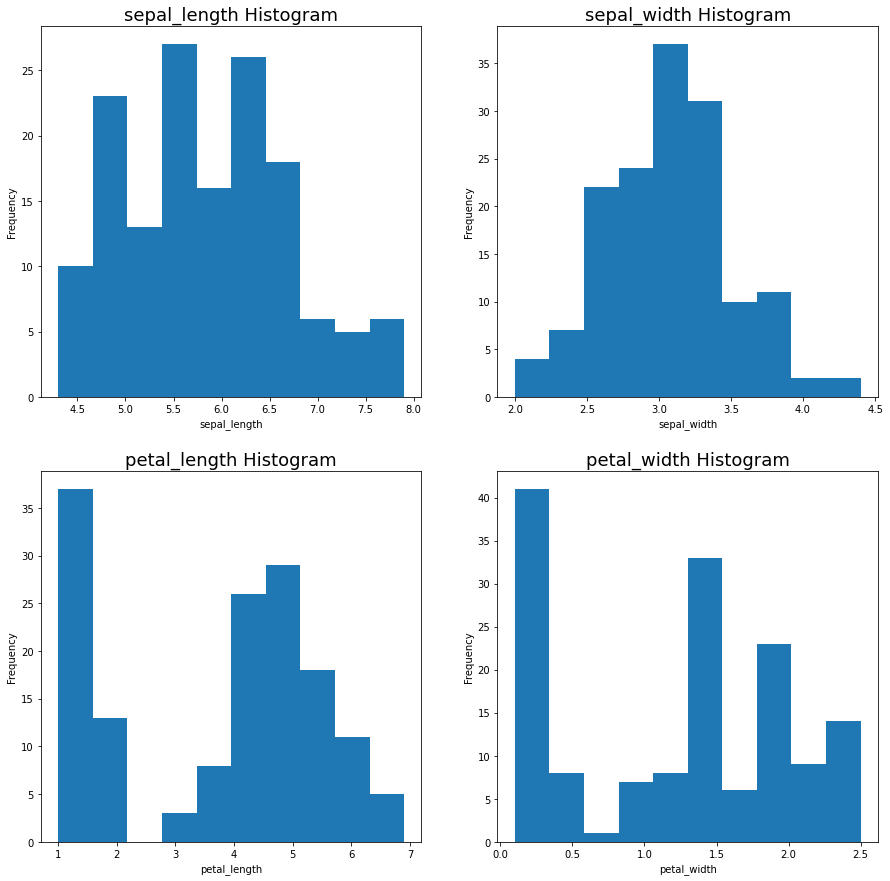

In [19]:
# Plot histogram for all the data attributes

position = 1
plt.figure(figsize=(15,15))
for column in df.columns:
    if column != "class":
        plt.subplot(2,2,position)
        plt.hist(df[column])
        plt.title(column + " Histogram", fontdict = {'fontsize' : 18})
        plt.xlabel(column)
        plt.ylabel("Frequency")
        position += 1
        


In [20]:
# Plot histogram for all the data attributes per class, i.e. grouped by classes

# do grouping
# renamed the column named "class" because I was running into some problems as that is a reserved word

df.rename(columns={'class': 'flower_class'}, inplace=True)
classes = df.groupby(["flower_class"])


<Figure size 1080x1080 with 0 Axes>

<AxesSubplot:>

(array([ 5.,  1.,  6.,  5., 12.,  8.,  3.,  5.,  2.,  3.]),
 array([4.3 , 4.45, 4.6 , 4.75, 4.9 , 5.05, 5.2 , 5.35, 5.5 , 5.65, 5.8 ]),
 <BarContainer object of 10 artists>)

Text(0.5, 1.0, 'Iris-setosa sepal_length Histogram')

Text(0.5, 0, 'sepal_length')

Text(0, 0.5, 'Frequency')

<AxesSubplot:>

(array([ 1.,  0.,  1., 10.,  7., 15.,  6.,  6.,  2.,  2.]),
 array([2.3 , 2.51, 2.72, 2.93, 3.14, 3.35, 3.56, 3.77, 3.98, 4.19, 4.4 ]),
 <BarContainer object of 10 artists>)

Text(0.5, 1.0, 'Iris-setosa sepal_width Histogram')

Text(0.5, 0, 'sepal_width')

Text(0, 0.5, 'Frequency')

<AxesSubplot:>

(array([ 1.,  1.,  2.,  8., 12., 13.,  7.,  4.,  0.,  2.]),
 array([1.  , 1.09, 1.18, 1.27, 1.36, 1.45, 1.54, 1.63, 1.72, 1.81, 1.9 ]),
 <BarContainer object of 10 artists>)

Text(0.5, 1.0, 'Iris-setosa petal_length Histogram')

Text(0.5, 0, 'petal_length')

Text(0, 0.5, 'Frequency')

<AxesSubplot:>

(array([ 5.,  0., 29.,  7.,  0.,  0.,  7.,  0.,  1.,  1.]),
 array([0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55, 0.6 ]),
 <BarContainer object of 10 artists>)

Text(0.5, 1.0, 'Iris-setosa petal_width Histogram')

Text(0.5, 0, 'petal_width')

Text(0, 0.5, 'Frequency')

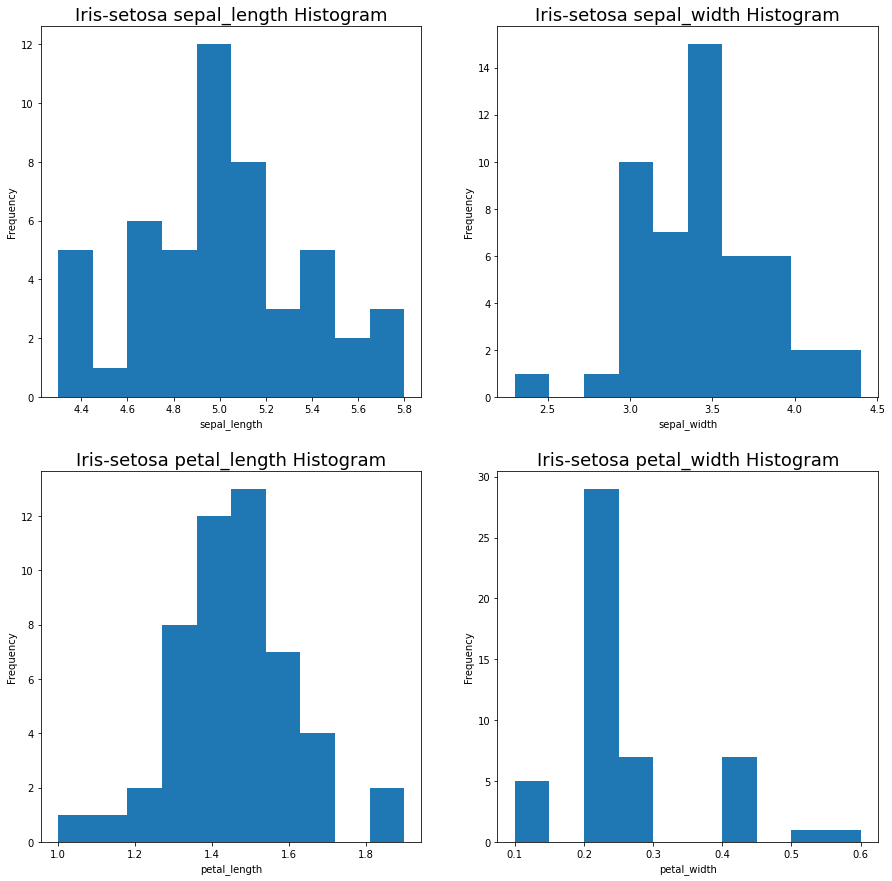

In [21]:
# plot setosa class

setosa = classes.get_group('Iris-setosa')

position = 1
plt.figure(figsize=(15,15))
for column in setosa.columns:
    if column != "flower_class":
        plt.subplot(2,2,position)
        plt.hist(setosa[column])
        plt.title("Iris-setosa " + column + " Histogram", fontdict = {'fontsize' : 18})
        plt.xlabel(column)
        plt.ylabel("Frequency")
        position += 1 

<Figure size 1080x1080 with 0 Axes>

<AxesSubplot:>

(array([ 4.,  1.,  6., 10.,  5.,  8.,  5.,  3.,  5.,  3.]),
 array([4.9 , 5.11, 5.32, 5.53, 5.74, 5.95, 6.16, 6.37, 6.58, 6.79, 7.  ]),
 <BarContainer object of 10 artists>)

Text(0.5, 1.0, 'Iris-versicolor sepal_length Histogram')

Text(0.5, 0, 'sepal_length')

Text(0, 0.5, 'Frequency')

<AxesSubplot:>

(array([ 1.,  2.,  6.,  4.,  3., 11.,  7., 11.,  3.,  2.]),
 array([2.  , 2.14, 2.28, 2.42, 2.56, 2.7 , 2.84, 2.98, 3.12, 3.26, 3.4 ]),
 <BarContainer object of 10 artists>)

Text(0.5, 1.0, 'Iris-versicolor sepal_width Histogram')

Text(0.5, 0, 'sepal_width')

Text(0, 0.5, 'Frequency')

<AxesSubplot:>

(array([ 1.,  2.,  3.,  2.,  8.,  7.,  6., 10.,  7.,  4.]),
 array([3.  , 3.21, 3.42, 3.63, 3.84, 4.05, 4.26, 4.47, 4.68, 4.89, 5.1 ]),
 <BarContainer object of 10 artists>)

Text(0.5, 1.0, 'Iris-versicolor petal_length Histogram')

Text(0.5, 0, 'petal_length')

Text(0, 0.5, 'Frequency')

<AxesSubplot:>

(array([ 7.,  3.,  5., 13.,  0.,  7., 10.,  3.,  1.,  1.]),
 array([1.  , 1.08, 1.16, 1.24, 1.32, 1.4 , 1.48, 1.56, 1.64, 1.72, 1.8 ]),
 <BarContainer object of 10 artists>)

Text(0.5, 1.0, 'Iris-versicolor petal_width Histogram')

Text(0.5, 0, 'petal_width')

Text(0, 0.5, 'Frequency')

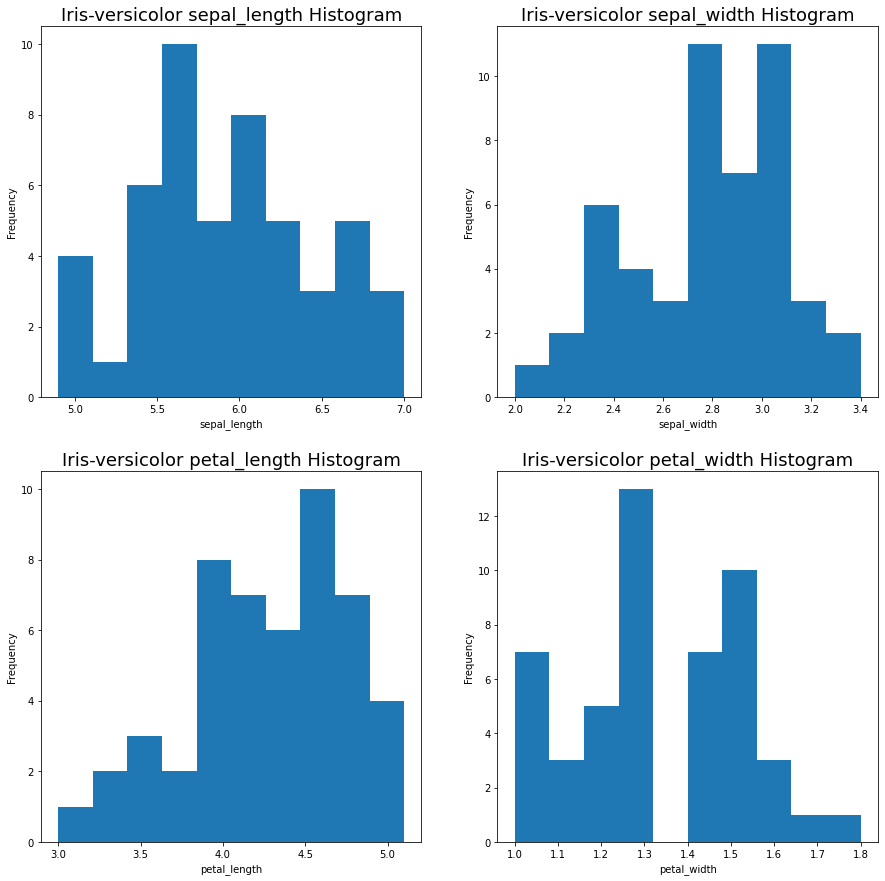

In [22]:
# plot versicolor class

versicolor = classes.get_group('Iris-versicolor')

position = 1
plt.figure(figsize=(15,15))
for column in versicolor.columns:
    if column != "flower_class":
        plt.subplot(2,2,position)
        plt.hist(versicolor[column])
        plt.title("Iris-versicolor " + column + " Histogram", fontdict = {'fontsize' : 18})
        plt.xlabel(column)
        plt.ylabel("Frequency")
        position += 1 

<Figure size 1080x1080 with 0 Axes>

<AxesSubplot:>

(array([ 1.,  0.,  5.,  5.,  8.,  9., 10.,  5.,  1.,  6.]),
 array([4.9, 5.2, 5.5, 5.8, 6.1, 6.4, 6.7, 7. , 7.3, 7.6, 7.9]),
 <BarContainer object of 10 artists>)

Text(0.5, 1.0, 'Iris-virginica sepal_length Histogram')

Text(0.5, 0, 'sepal_length')

Text(0, 0.5, 'Frequency')

<AxesSubplot:>

(array([ 1.,  4.,  2., 12.,  2., 16.,  8.,  2.,  1.,  2.]),
 array([2.2 , 2.36, 2.52, 2.68, 2.84, 3.  , 3.16, 3.32, 3.48, 3.64, 3.8 ]),
 <BarContainer object of 10 artists>)

Text(0.5, 1.0, 'Iris-virginica sepal_width Histogram')

Text(0.5, 0, 'sepal_width')

Text(0, 0.5, 'Frequency')

<AxesSubplot:>

(array([ 1.,  5., 12.,  4.,  9.,  8.,  5.,  2.,  1.,  3.]),
 array([4.5 , 4.74, 4.98, 5.22, 5.46, 5.7 , 5.94, 6.18, 6.42, 6.66, 6.9 ]),
 <BarContainer object of 10 artists>)

Text(0.5, 1.0, 'Iris-virginica petal_length Histogram')

Text(0.5, 0, 'petal_length')

Text(0, 0.5, 'Frequency')

<AxesSubplot:>

(array([ 3.,  1.,  1., 11.,  5.,  6.,  6.,  3.,  8.,  6.]),
 array([1.4 , 1.51, 1.62, 1.73, 1.84, 1.95, 2.06, 2.17, 2.28, 2.39, 2.5 ]),
 <BarContainer object of 10 artists>)

Text(0.5, 1.0, 'Iris-virginica petal_width Histogram')

Text(0.5, 0, 'petal_width')

Text(0, 0.5, 'Frequency')

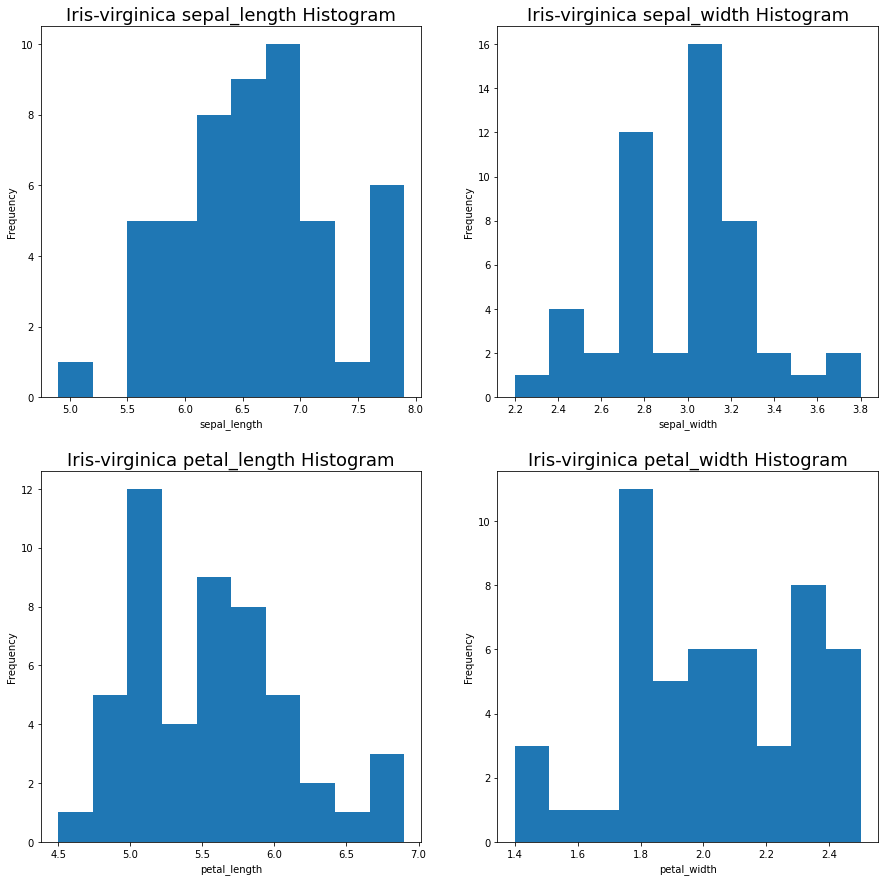

In [23]:
# plot Iris-virginica class

virginica = classes.get_group('Iris-virginica')

position = 1
plt.figure(figsize=(15,15))
for column in virginica.columns:
    if column != "flower_class":
        plt.subplot(2,2,position)
        plt.hist(virginica[column])
        plt.title("Iris-virginica " + column + " Histogram", fontdict = {'fontsize' : 18})
        plt.xlabel(column)
        plt.ylabel("Frequency")
        position += 1 

# Part 3: Statistical Analysis 
In this part, you will explore some curve fitting and dimensionality reductions attributes


### PCA
- Use Scikit to do PCA on the IRIS dataset
- do a bar plot that shows the importance of info in each of the new dimensions
- use PCA to reduce the number of attributes by 1. Note that for all the next parts, you will use the reduced data

(150, 4)

array([0.92461872, 0.05306648, 0.01710261, 0.00521218])

<BarContainer object of 4 artists>

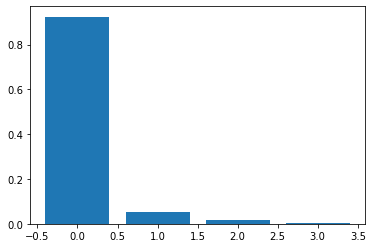

In [28]:
from sklearn.decomposition import PCA
from sklearn import datasets

# import the IRIS dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Create a regular PCA model 
# not reducing the number of features, but making them more efficient
pca_all = PCA()
reduced_data_pca = pca_all.fit_transform(X)
reduced_data_pca.shape

# map to show feature importance
# map
pca_all.explained_variance_ratio_
plt.bar(np.arange(4),pca_all.explained_variance_ratio_)


(150, 3)

<BarContainer object of 3 artists>

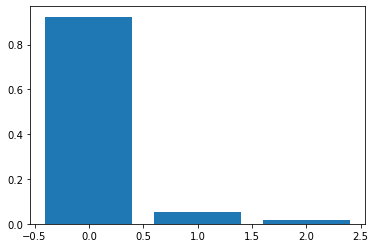

In [29]:
# reduce to 3 features
pca = PCA(n_components=3)
# Fit and transform the data to the model
reduced_data_pca = pca.fit_transform(X)
# Inspect the shape
reduced_data_pca.shape
# map the new feature importance
plt.bar(np.arange(3),pca.explained_variance_ratio_)

# Part 4: Machine Learning
In this part, you will explore the use of supervised and non supervised learning

### Non-Supervised Learning 
- using Kmeans, divide the data into different clusters. The number of clusters should be the same as the number of categories you have in the data
- Do scatter plot for each two combination of the three dimensions together (0 vs 1), (0 vs 2), (1 vs 2). Use the kmeans labels to color the points in the scatter plots

KMeans(n_clusters=3)

[[ 2.37446608  0.26311694  0.05093851]
 [-2.64241546  0.19088505  0.01358128]
 [ 0.67566229 -0.31520477 -0.04217302]]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


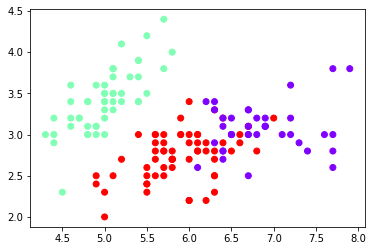

In [30]:
from sklearn.cluster import KMeans  
kmeans = KMeans(n_clusters=3)  
kmeans.fit(reduced_data_pca)  
print(kmeans.cluster_centers_)  
print(kmeans.labels_)  
plt.scatter(X[:,0],X[:,1], c=kmeans.labels_, cmap='rainbow')  

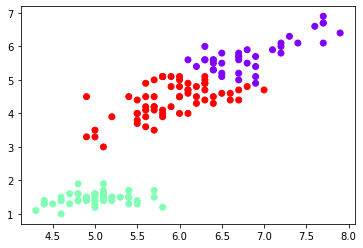

In [31]:
plt.scatter(X[:,0],X[:,2], c=kmeans.labels_, cmap='rainbow')  

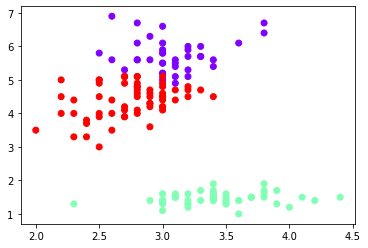

In [32]:
plt.scatter(X[:,1],X[:,2], c=kmeans.labels_, cmap='rainbow')  

### Supervised-Learning
- Divide your dataset to 80% training and 20% validation
- Build a Logistci regression model for the reduced IRIS dataset
- What is the training accuracy
- What is the validation accuracy
- Form the confusion matrix

I am going to use the logistic regression to try to predict which of 3 categories (flower types) an observation is based on the reduced 3 features from PCA
* The data I am using to make my prediction will be the array of data with 3 features (reduced_data_pca)
* The category I am trying to precidt will be the type of iris (iris.target)

In [33]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(reduced_data_pca, iris.target, test_size=0.20, random_state=0)

In [34]:
# build the model and fit data
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
logisticRegr.fit(x_train, y_train)

LogisticRegression()

In [35]:
# predict for the validation set
predictions = logisticRegr.predict(x_test)
# Use score method to get accuracy of model
score = logisticRegr.score(x_test, y_test)
print(score)

1.0


[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]


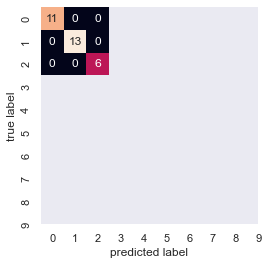

In [36]:
# looks like we did great!  let's check out the confusion matrix
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

# make it pretty
import seaborn as sns; sns.set()  # for plot styling
sns.heatmap(cm, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=range(10),
            yticklabels=range(10))
plt.ylabel('true label')
plt.xlabel('predicted label');